## **Feynn Labs - Machine Learning Internship**

### **Task - Analysing users review and ratings for E4W vehicles.**

**Importing Libraries & Loading the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_car = pd.read_csv('/content/E4W user reviews.csv')

**Exploratory Data Analysis & Visualization**

In [ ]:
df_car.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating
0,Need to improve body style.It's amazing and dr...,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0
1,"Tata EV has lot of flaws, worst part is servic...",3.0,2.0,1.0,2.0,1.0,New,Few thousand kilometers,0.0
2,"Very nice car , environmental friendly i like ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0
3,Company did not provide slow charging station ...,2.0,2.0,1.0,1.0,1.0,New,Haven't driven it,0.0
4,Servicing and maintenance overall good and goo...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Few hundred kilometers,5.0


In [ ]:
df_car.shape

(129, 9)

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
dtypes: float64(6), object(3)
memory usage: 9.2+ KB


In [ ]:
df_car.describe()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,4.472868,4.418605,4.418605,4.418605,4.162791,4.341085
std,0.968871,1.036051,1.150392,1.122899,1.345076,1.389110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


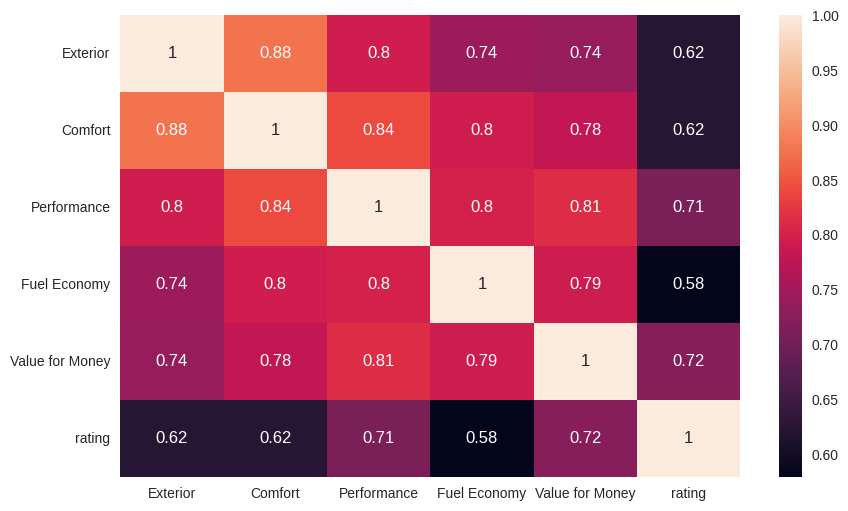

In [ ]:
plt.figure(figsize=(10,6))
x_axis_labels = ['Exterior','Comfort','Performance','Fuel Economy','Value for Money','rating']
sns.heatmap(df_car.corr(),xticklabels = x_axis_labels,annot=True)
plt.show()

Exterior & Comfort, Performance & Comfort seem to have a high positive correlation

In [ ]:
df_car['Condition'].value_counts(normalize=True)*100

New              48.837209
Not Purchased    35.658915
Used             15.503876
Name: Condition, dtype: float64

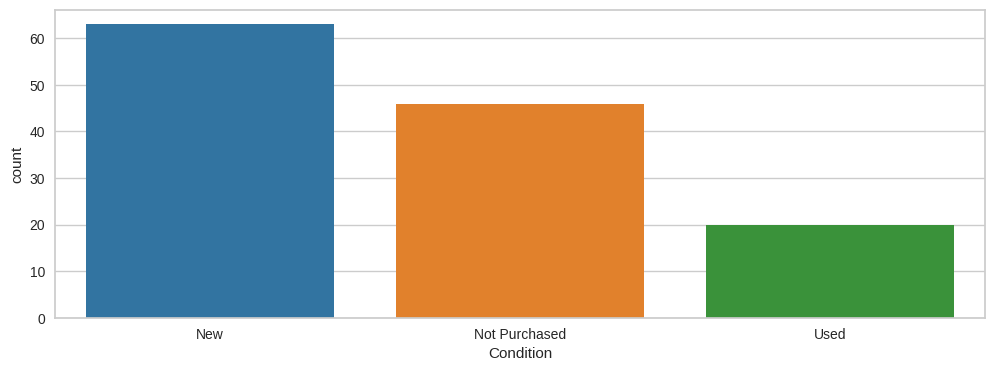

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Condition',data=df_car, palette='tab10')
plt.show()

Most of the E4W vehicles are New

In [ ]:
df_car['driven'].value_counts(normalize=True)*100

Did a short drive once     28.682171
Few thousand kilometers    26.356589
Few hundred kilometers     24.031008
Haven't driven it          19.379845
Its my mate since ages      1.550388
Name: driven, dtype: float64

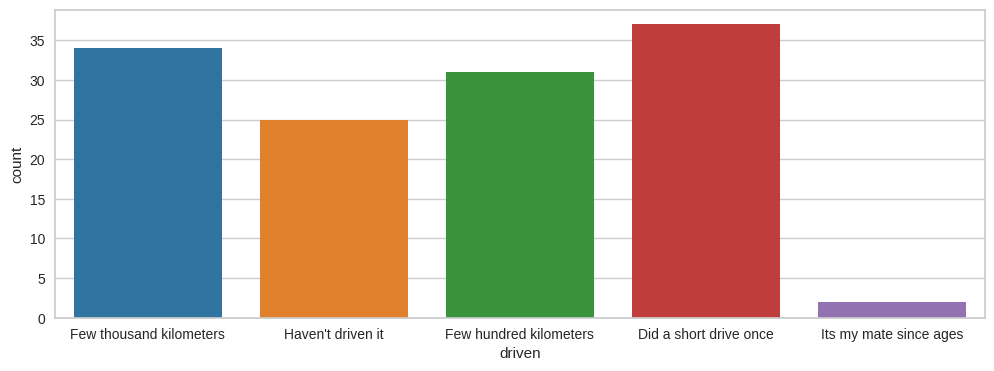

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='driven',data=df_car, palette='tab10')
plt.show()

Most of the users did a short drive once, drove few hundred and thousand kilometers.

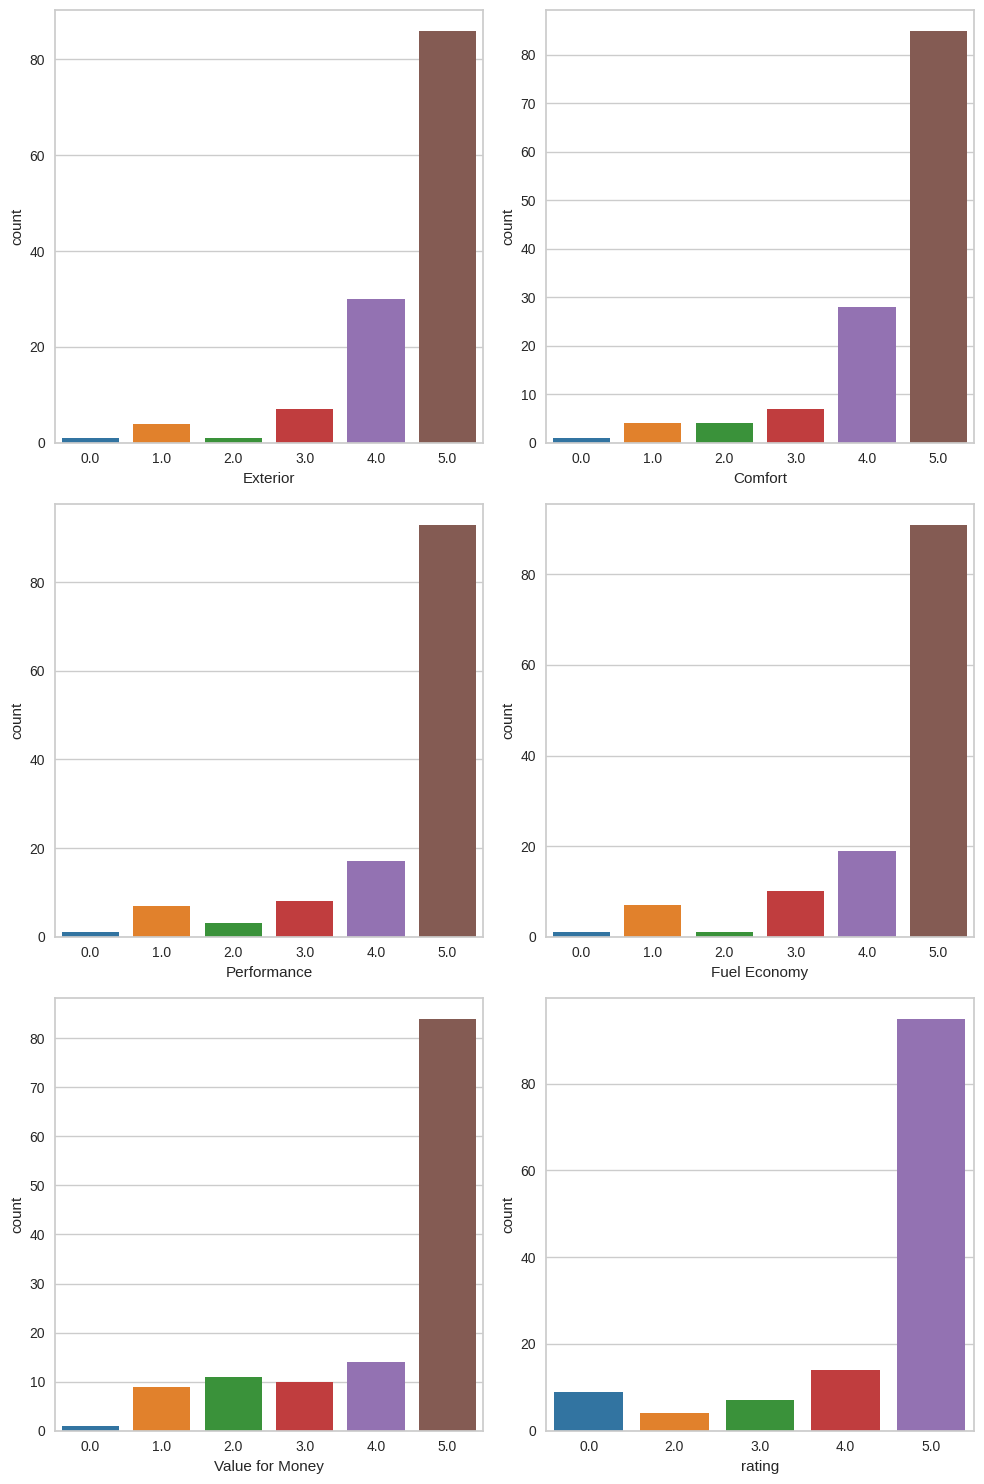

In [ ]:
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Exterior',data=df_car,ax=axes[0][0], palette='tab10')
sns.countplot(x='Comfort',data=df_car,ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data=df_car,ax=axes[1][0], palette='tab10')
sns.countplot(x='Fuel Economy',data=df_car,ax=axes[1][1], palette='tab10')
sns.countplot(x='Value for Money',data=df_car,ax=axes[2][0], palette='tab10')
sns.countplot(x='rating',data=df_car,ax=axes[2][1], palette='tab10')
plt.show()

People seem to be very positive regarding the Exterior, Comfort, Performance, Fuel Economy and consider an EV as a Value for Money

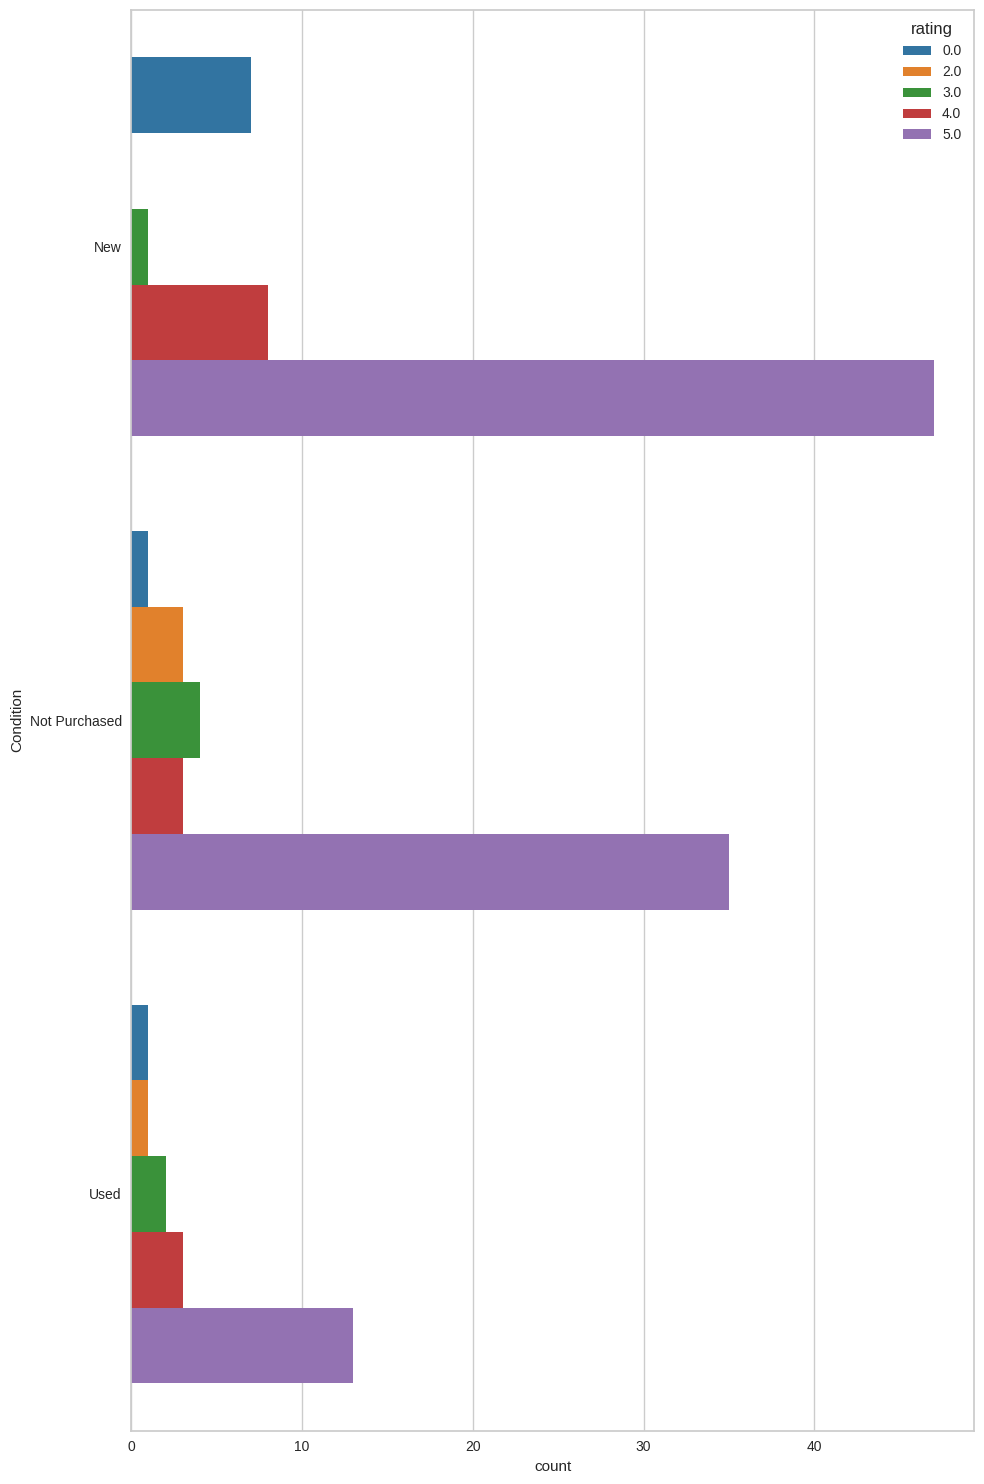

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(y='Condition',data=df_car,hue='rating', palette='tab10')
plt.show()

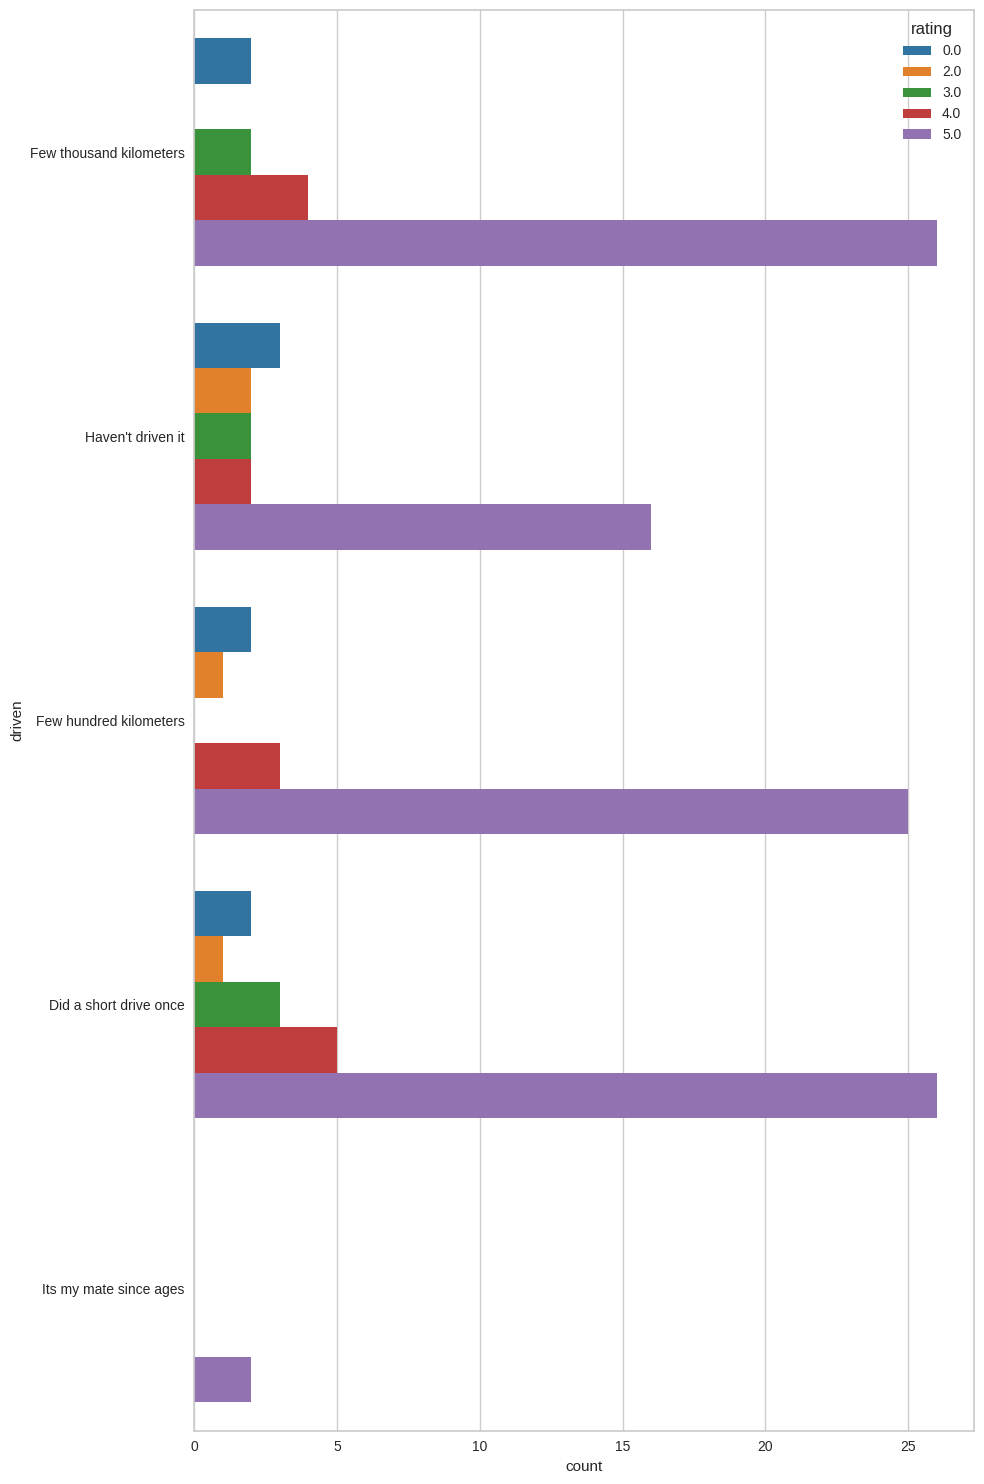

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(y='driven',data=df_car,hue='rating', palette='tab10')
plt.show()

It is interesting to note that users found an EV attractive even when they didn't purchase and drive one.

In [ ]:
# Creating a copy of the data
df1 = df_car.copy()
df1.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating
0,Need to improve body style.It's amazing and dr...,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0
1,"Tata EV has lot of flaws, worst part is servic...",3.0,2.0,1.0,2.0,1.0,New,Few thousand kilometers,0.0
2,"Very nice car , environmental friendly i like ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0
3,Company did not provide slow charging station ...,2.0,2.0,1.0,1.0,1.0,New,Haven't driven it,0.0
4,Servicing and maintenance overall good and goo...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Few hundred kilometers,5.0


In [ ]:
df1.drop(df1.iloc[:,1:],inplace=True,axis=1)
df1.head()

,review
0,Need to improve body style.It's amazing and dr...
1,"Tata EV has lot of flaws, worst part is servic..."
2,"Very nice car , environmental friendly i like ..."
3,Company did not provide slow charging station ...
4,Servicing and maintenance overall good and goo...


**Sentiment Analysis of Reviews**

In [ ]:
lm = WordNetLemmatizer()

In [ ]:
# Creating a function for cleaning the text
def clean(text):
  text = str(text).lower()
  text = re.sub('[^a-z]',' ',str(text))
  text = text.split()
  text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
  text = ' '.join(str(k) for k in text)
  return text

In [ ]:
df1['review'][0]

"Need to improve body style.It's amazing and drives smoothly.I am happy to share feedback to each one. Very great experience and also come with lot of benefits. Fuel saving car."

In [ ]:
df1['review'][0:1].apply(clean)

0    need improve body style amazing drive smoothly...
Name: review, dtype: object

In [ ]:
# Creating a function to get polarity and subjectivity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
df1['cleantext'] = df1['review'].apply(clean)
df1['subjectivity'] = df1['cleantext'].apply(getsubjectivity)
df1['polarity'] = df1['cleantext'].apply(getpolarity)
df1['analysis'] = df1['polarity'].apply(getAnalysis)
df1.head()

,review,cleantext,subjectivity,polarity,analysis
0,Need to improve body style.It's amazing and dr...,need improve body style amazing drive smoothly...,0.883333,0.733333,Positive
1,"Tata EV has lot of flaws, worst part is servic...",tata ev lot flaw worst part service center clu...,0.466667,-0.286364,Negative
2,"Very nice car , environmental friendly i like ...",nice car environmental friendly like car happy...,0.833333,0.591667,Positive
3,Company did not provide slow charging station ...,company provide slow charging station new car ...,0.239394,0.020707,Positive
4,Servicing and maintenance overall good and goo...,servicing maintenance overall good good mileag...,0.562500,0.512500,Positive


In [ ]:
score =df1['analysis'].value_counts()
score

Positive    123
Negative      6
Name: analysis, dtype: int64

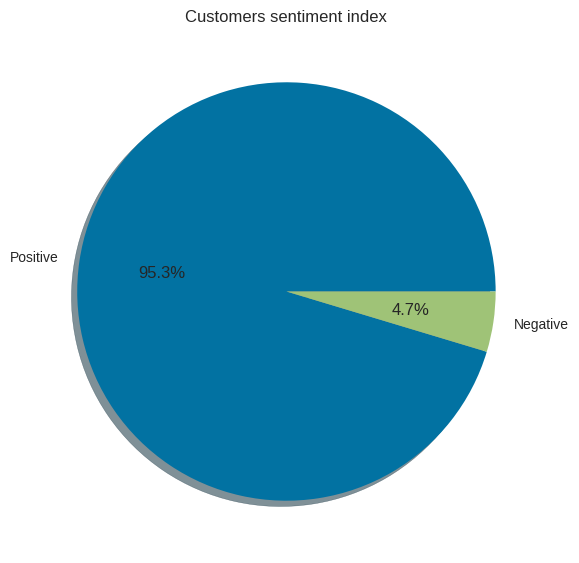

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(score,labels=['Positive','Negative'],shadow=True,autopct='%1.1f%%')
plt.title('Customers sentiment index')
plt.show()

**WordCloud**

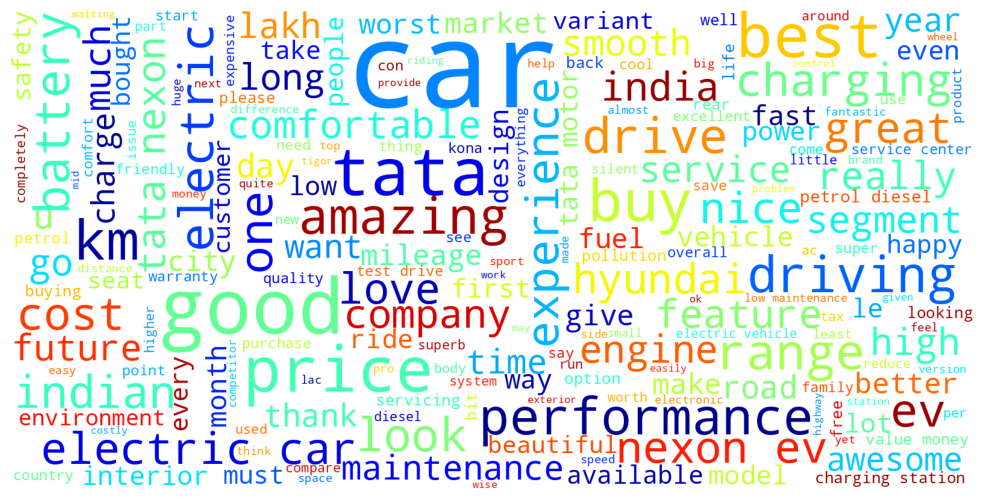

In [ ]:
# Creating a WordCloud
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
  stopwords = set(STOPWORDS)
  all_words = ' '.join([text for text in wd_list])
  wordcloud = WordCloud(background_color='white',
                        stopwords=stopwords,
                        width=1600, height=800,
                        random_state=1,
                        colormap='jet',
                        max_words=200,
                        max_font_size=200).generate(all_words)
  plt.figure(figsize=(10,10))
  plt.axis('off')
  plt.imshow(wordcloud)
word_cloud(df1['cleantext'][:5000])

Some popular words that can be observed in the reviews include: good, amazing,
 performance, electric car, best, love, experience, battery, great, tata. These words are mostly positive, indicating most reviews in the dataset express a positive sentiment.

In [ ]:
df2 = df_car.copy()
df2 = df2.iloc[:,1:6]
df2.head()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money
0,5.0,5.0,5.0,5.0,5.0
1,3.0,2.0,1.0,2.0,1.0
2,5.0,5.0,5.0,5.0,5.0
3,2.0,2.0,1.0,1.0,1.0
4,5.0,5.0,5.0,5.0,5.0


**Principal Component Analysis**

In [ ]:
pca = PCA()
principal_components = pca.fit_transform(df2)
pca_df = pd.DataFrame(data=principal_components,columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-1.407144,-0.064815,0.056179,0.073389,-0.007120
1,5.877478,0.263820,-0.006428,0.903018,0.359038
2,-1.407144,-0.064815,0.056179,0.073389,-0.007120
3,6.685448,-0.177019,0.604307,0.365228,-0.341412
4,-1.407144,-0.064815,0.056179,0.073389,-0.007120


In [ ]:
pca_df[['PCA1','PCA2','PCA3','PCA4','PCA5']].std()

PCA1    2.318130
PCA2    0.634648
PCA3    0.536859
PCA4    0.471836
PCA5    0.343938
dtype: float64

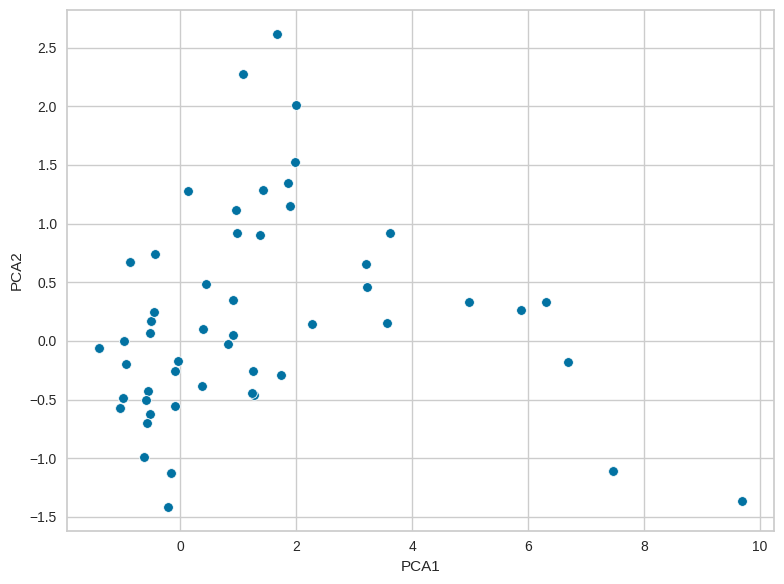

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',palette='deep')
plt.show()

**Segment Extraction using KMeans Clustering**

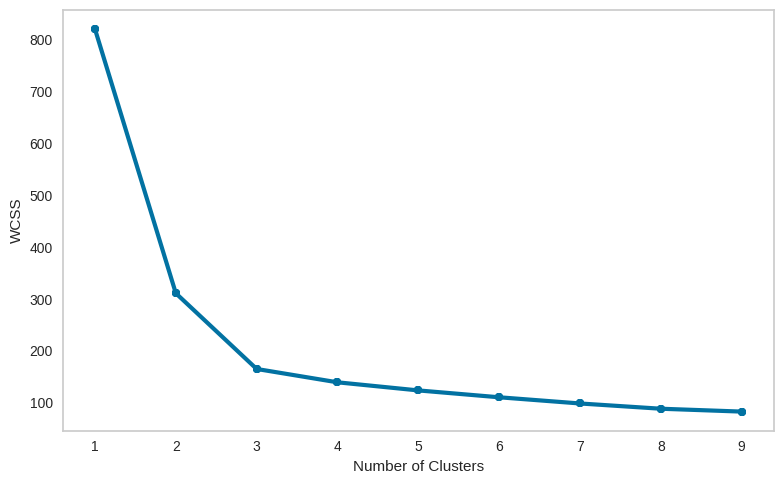

In [ ]:
# Using elbow method
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 10)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,10),wcss, marker = '8',linewidth='3')
plt.xlabel(range(1,10))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

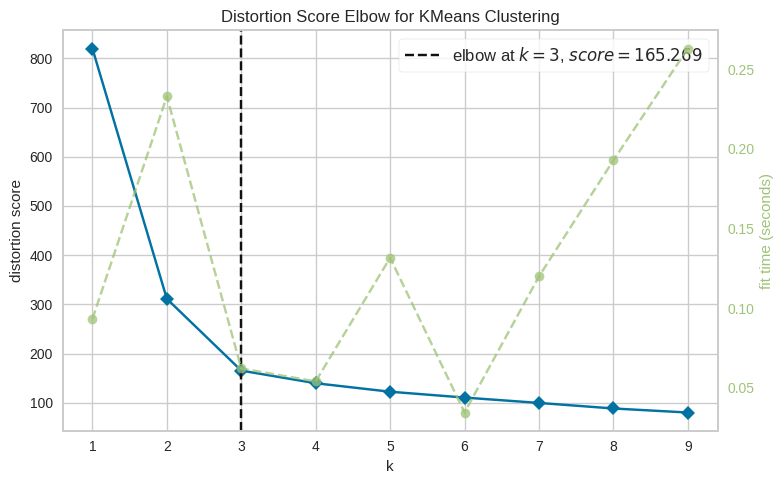

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
plt.figure(figsize=(8,5))
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df2)
visualizer.show()

It appears that there is an elbow at k = 3 clusters

In [ ]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df2)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,cluster
0,-1.407144,-0.064815,0.056179,0.073389,-0.007120,0
1,5.877478,0.263820,-0.006428,0.903018,0.359038,1
2,-1.407144,-0.064815,0.056179,0.073389,-0.007120,0
3,6.685448,-0.177019,0.604307,0.365228,-0.341412,1
4,-1.407144,-0.064815,0.056179,0.073389,-0.007120,0


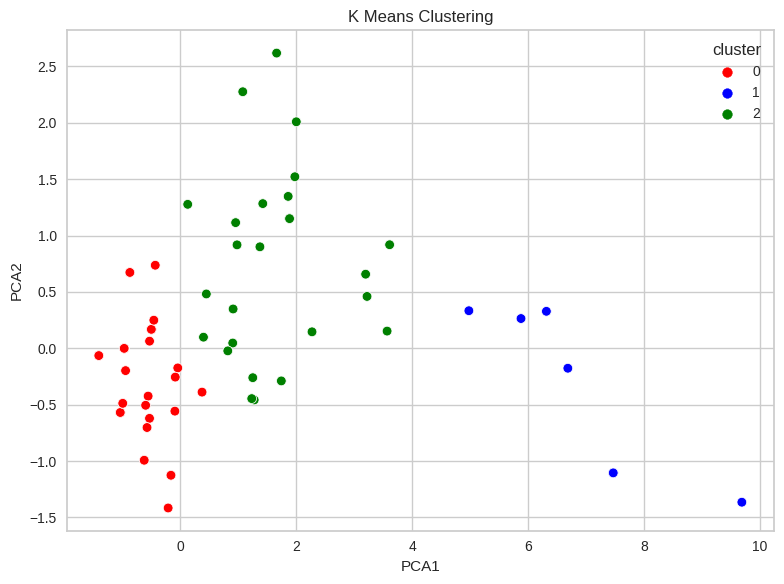

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_df_kmeans,palette=['red','blue','green'])
plt.title('K Means Clustering')
plt.show()

In [ ]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df2)
pca_df_kmeans1 = pd.concat([df_car,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans1.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,cluster
0,Need to improve body style.It's amazing and dr...,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,0
1,"Tata EV has lot of flaws, worst part is servic...",3.0,2.0,1.0,2.0,1.0,New,Few thousand kilometers,0.0,2
2,"Very nice car , environmental friendly i like ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,0
3,Company did not provide slow charging station ...,2.0,2.0,1.0,1.0,1.0,New,Haven't driven it,0.0,2
4,Servicing and maintenance overall good and goo...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Few hundred kilometers,5.0,0


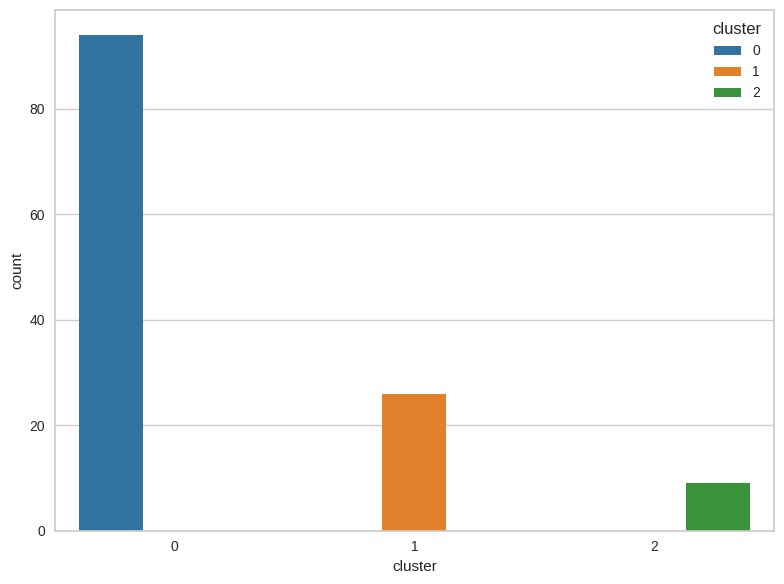

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='cluster',data=pca_df_kmeans1, hue='cluster', palette='tab10')
plt.show()

In [ ]:
pca_df_kmeans1['cluster'].value_counts(normalize=True)*100

0    72.868217
1    20.155039
2     6.976744
Name: cluster, dtype: float64

**Profiling and Describing Segments**

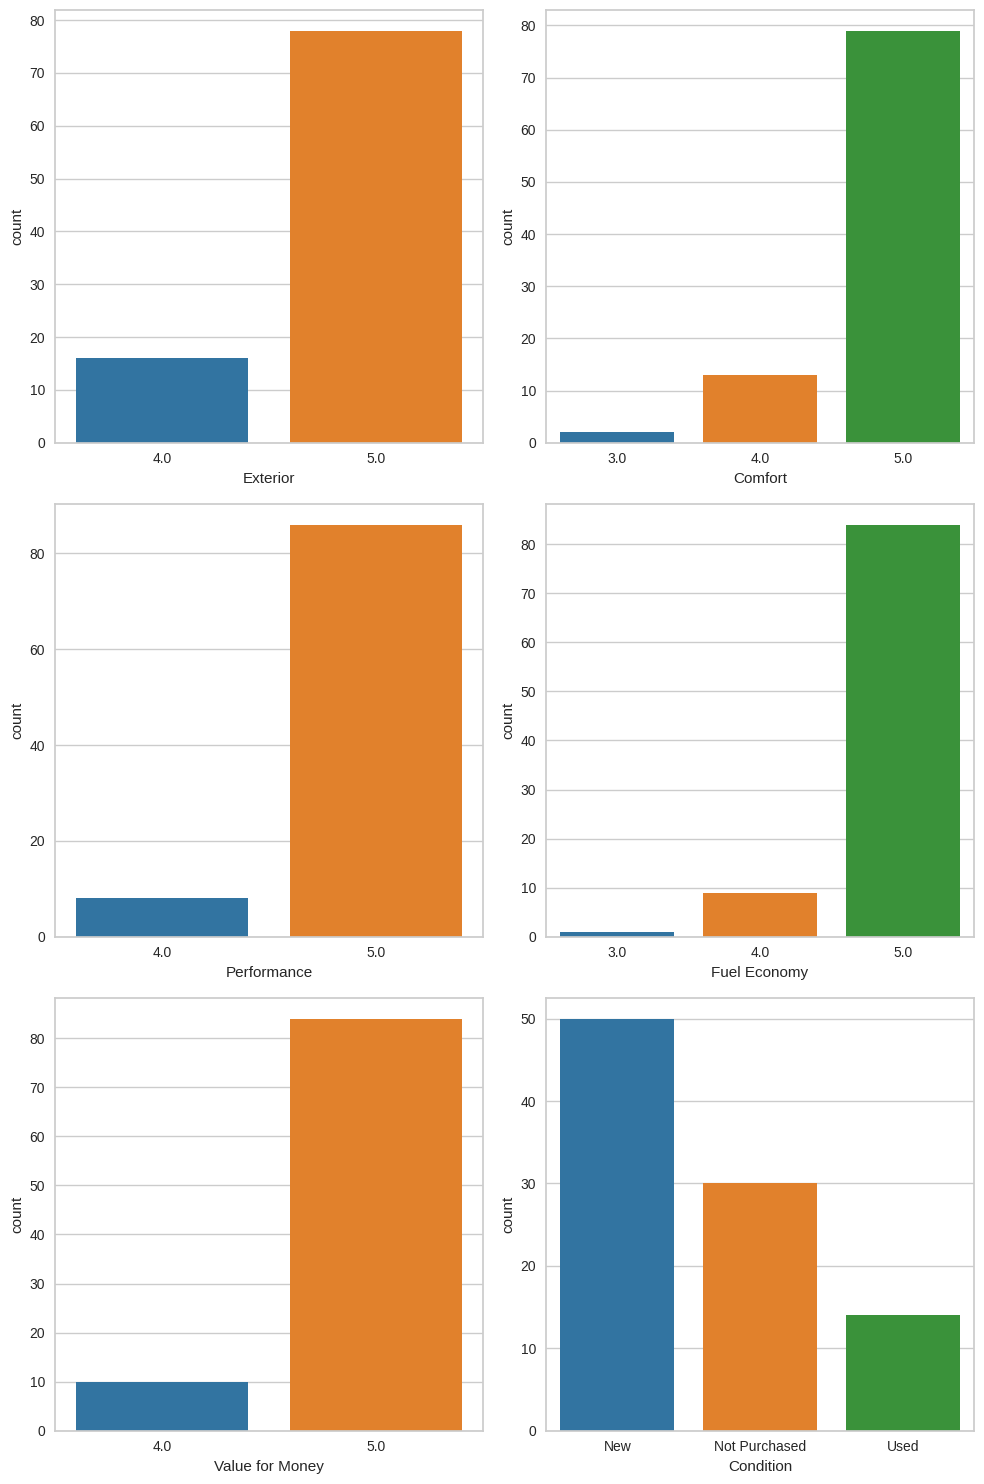

In [ ]:
# Analysis of Cluster 1
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Exterior',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax = axes[0][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[1][0], palette='tab10')
sns.countplot(x='Fuel Economy',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[1][1], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[2][0], palette='tab10')
sns.countplot(x='Condition',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[2][1], palette='tab10')
plt.show()

This cluster contains users with excellent reviews for all the attributes and most of them have new EV's.

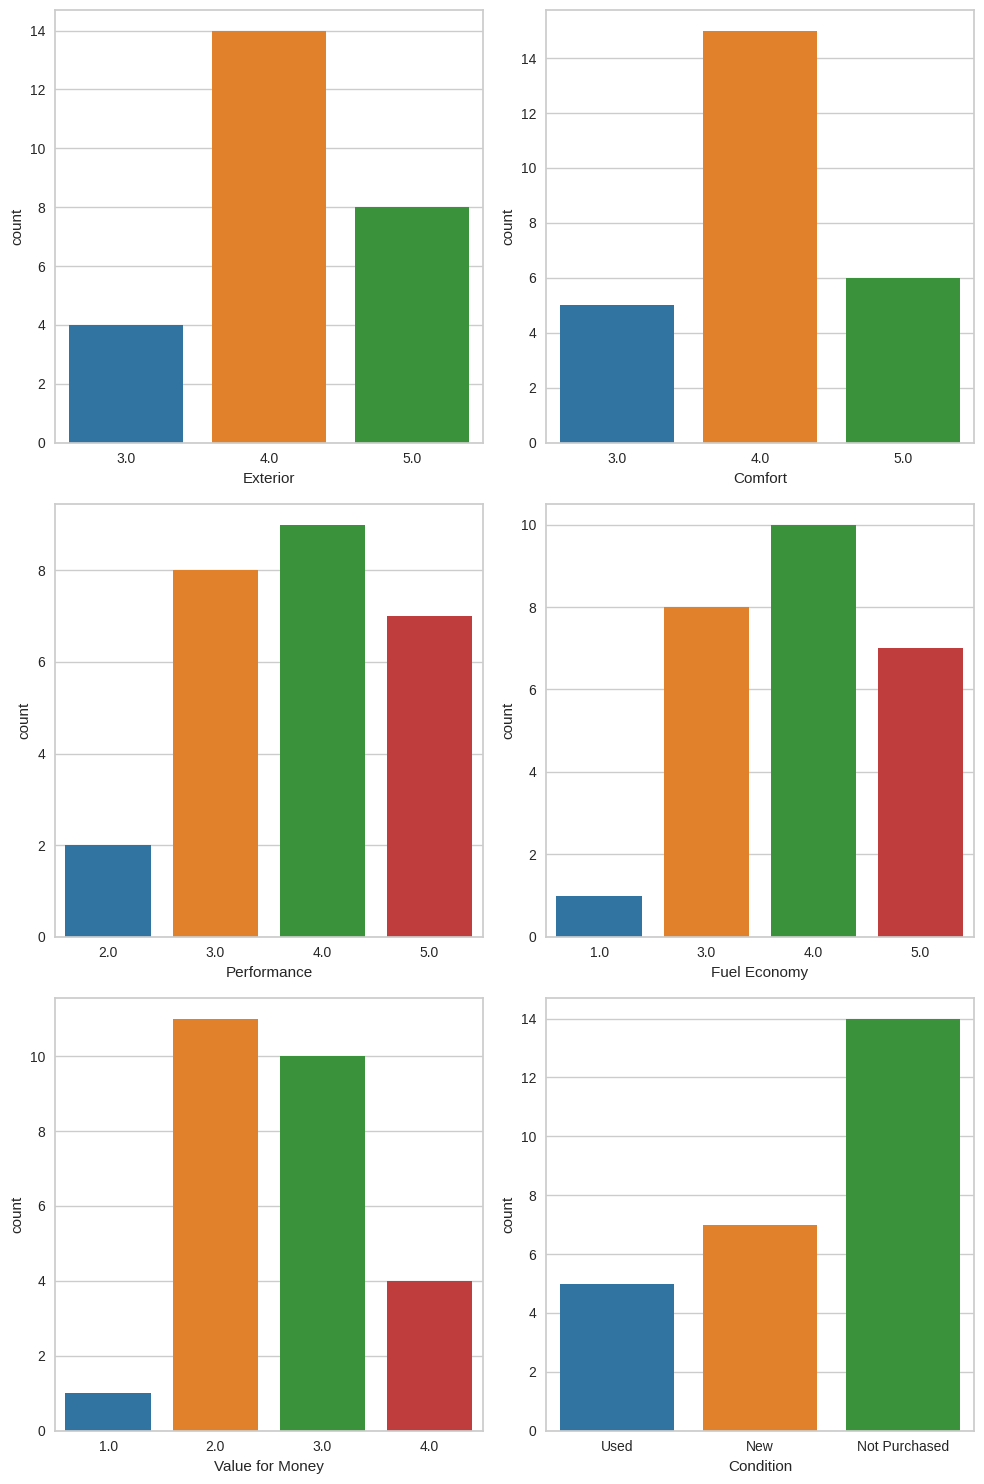

In [ ]:
# Analysis of Cluster 2
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Exterior',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax = axes[0][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[1][0], palette='tab10')
sns.countplot(x='Fuel Economy',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[1][1], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[2][0], palette='tab10')
sns.countplot(x='Condition',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[2][1], palette='tab10')
plt.show()

This cluster contains users with negative reviews for all the attributes and most of them have new EV's.

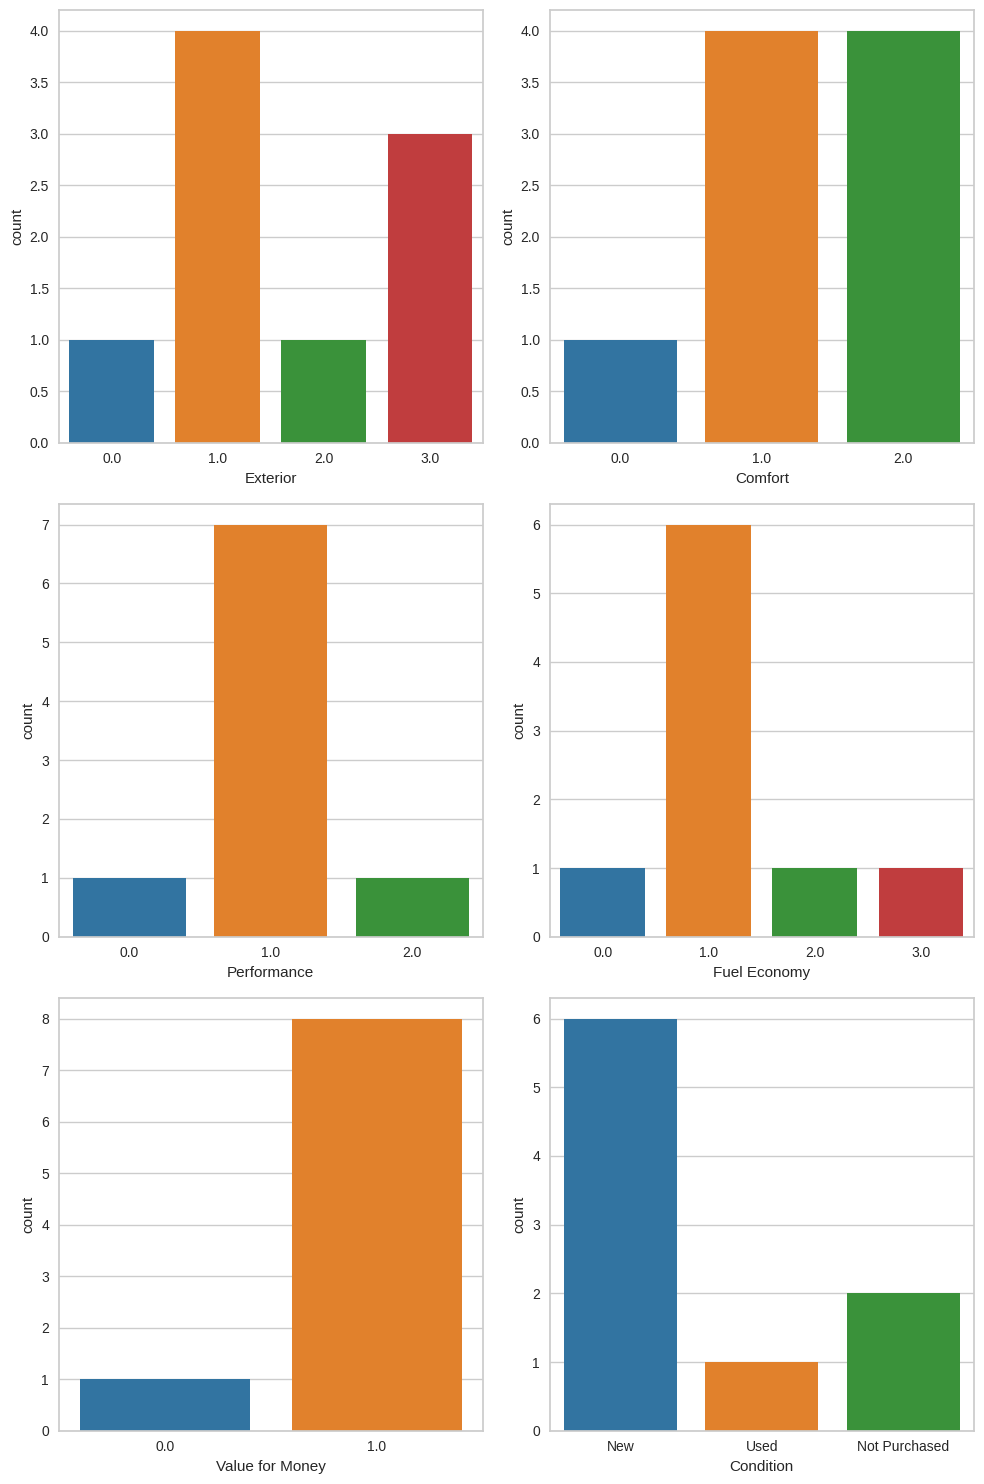

In [ ]:
# Analysis of Cluster 3
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Exterior',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax = axes[0][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[1][0], palette='tab10')
sns.countplot(x='Fuel Economy',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[1][1], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[2][0], palette='tab10')
sns.countplot(x='Condition',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[2][1], palette='tab10')
plt.show()

This cluster contains user who are satisfied with the Exterior and Comfort but have mixed reviews for all the other attributes and most them haven't purchased an EV.

In my opinion, this is the segment that a company can target easily and change their perception they have towards an EV.